# Importing Libraries

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Fetching

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

In [3]:
# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

In [4]:
# Open the connection
cur = conn.cursor()

In [ ]:
# Fetching the data
cur.execute('SELECT * FROM eda.king_county_house_sales AS k1 LEFT JOIN eda.king_county_house_details AS k2 ON k1.house_id = k2.id')
cur.fetchall()

In [6]:
# Import the data into a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_sales AS k1 LEFT JOIN eda.king_county_house_details AS k2 ON k1.house_id = k2.id"

eda_all = pd.read_sql(query_string, conn)

In [7]:
# Close the connection
conn.close()

# Exploring the Data

In [8]:
king_county = eda_all

In [9]:
king_county.head()

,date,price,house_id,id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


In [10]:
# Dropping the id columns, we don't need three id columns.
king_county = king_county.drop(king_county.columns[[3]], axis=1)

In [11]:
# Finding out the mean, median, standard deviation and so on.
king_county.describe()

,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


In [12]:
# Finding out the data types
king_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [13]:
# Finding out the null or missing data.
king_county.isna().sum()

date                0
price               0
house_id            0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
# Finding out the duplicated data
king_county['house_id'].duplicated().value_counts()

house_id
False    21420
True       177
Name: count, dtype: int64

## Follow-up questions;
__1. are there houses that have been sold more than once?__
- there are 177 duplicated cases, so yes.

__2. have all houses in house details been sold at least once?__
- there is no null data in the column for sale dates, so yes.

__3. which join keeps the repeated sales of the same house(s) with different sales dates?__
- cross join or union + append..?

__4. which join keeps houses (if any) that are in the database but haven’t been sold?__
- all houses are sold

__5. are there some joins that would lose them?__
- yes, there are some missing values in different columns, in case of a join, except of full join, if the missing data is ignored than the data will be lost. 

# Cleaning the Data

In [15]:
king_county.columns

Index(['date', 'price', 'house_id', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [16]:
# Dropping the columns of 'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'
king_county = king_county.drop(king_county.columns[[6,7,8,12,13,19,20]], axis=1)

In [17]:
king_county['yr_renovated'].value_counts()

yr_renovated
0.000        17005
20140.000       73
20030.000       31
20130.000       31
20070.000       30
             ...  
19460.000        1
19760.000        1
19590.000        1
19340.000        1
19440.000        1
Name: count, Length: 70, dtype: int64

In [18]:
king_county['yr_renovated'] = king_county['yr_renovated'].fillna(0)

In [19]:
king_county.isna().sum()

date             0
price            0
house_id         0
bedrooms         0
bathrooms        0
sqft_living      0
view            63
condition        0
grade            0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

In [20]:
# According to this project; https://github.com/leogachimu/King_County_House_Sales/blob/master/king_county_house_sales.ipynb
# The missing values are less than 1 percent of the data, which is 63 cases out of 21597 cases; therefore, the rows that has missing value will be removed.
king_county = king_county.drop(king_county[king_county['view'].isna()].index)

In [21]:
king_county.isna().sum()

date            0
price           0
house_id        0
bedrooms        0
bathrooms       0
sqft_living     0
view            0
condition       0
grade           0
yr_built        0
yr_renovated    0
zipcode         0
lat             0
long            0
dtype: int64

In [22]:
#grade — an index from 1 to 13, where 1–3 falls short of building construction and design, 
# 7 has an average level of construction and design, 
# and 11–13 have a high quality level of construction and design; https://medium.com/swlh/rudimentary-data-cleaning-techniques-using-king-county-wa-housing-dataset-f7716bdf827e

# According to this project; https://github.com/leogachimu/King_County_House_Sales/blob/master/king_county_house_sales.ipynb
replacement_c = {'Poor' : 1,
              'Fair' : 2,
              'Average' : 3,
              'Good' : 4,
              'Very Good' : 5}

replacement_g = {'Falls short of minimum building standards. Normally cabin or inferior structure' : (1,2,3),
                 'Generally older, low quality construction. Does not meet code' : 4,
                 'Low construction costs and workmanship. Small, simple design' : 5,
                 'Lowest grade currently meeting building code. Low quality materials and simple designs' : 6,
                 'Average grade of construction and design. Commonly seen in plats and older sub-divisions' : 7,
                 'Just above average in construction and design. Usually better materials in both the exterior and interior finish work' : 8,
                 'Better architectural design with extra interior and exterior design and quality' : 9,
                 'Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans' : 10,
                 'Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options' : 11,
                 'Custom design and excellent builders. All materials are of the highest quality and all conveniences are present' : 12,
                 'Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.' : 13}

king_county['condition'].replace(replacement_c, inplace=True)
king_county['grade'].replace(replacement_g, inplace=True)

In [23]:
king_county.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          21534 non-null  object 
 1   price         21534 non-null  float64
 2   house_id      21534 non-null  int64  
 3   bedrooms      21534 non-null  float64
 4   bathrooms     21534 non-null  float64
 5   sqft_living   21534 non-null  float64
 6   view          21534 non-null  float64
 7   condition     21534 non-null  int64  
 8   grade         21534 non-null  int64  
 9   yr_built      21534 non-null  int64  
 10  yr_renovated  21534 non-null  float64
 11  zipcode       21534 non-null  int64  
 12  lat           21534 non-null  float64
 13  long          21534 non-null  float64
dtypes: float64(8), int64(5), object(1)
memory usage: 2.5+ MB


In [24]:
king_county.date = pd.to_datetime(king_county.date)
king_county.bedrooms = np.ceil(king_county.bedrooms).astype(int)
king_county.bathrooms = np.ceil(king_county.bathrooms).astype(int)
king_county.view = np.ceil(king_county.view).astype(int)
king_county.yr_renovated = king_county.yr_renovated.astype(int)
king_county.sqft_living = king_county.sqft_living.astype(float).astype(int)

king_county.dtypes

date            datetime64[ns]
price                  float64
house_id                 int64
bedrooms                 int64
bathrooms                int64
sqft_living              int64
view                     int64
condition                int64
grade                    int64
yr_built                 int64
yr_renovated             int64
zipcode                  int64
lat                    float64
long                   float64
dtype: object

# Dealing with outliers

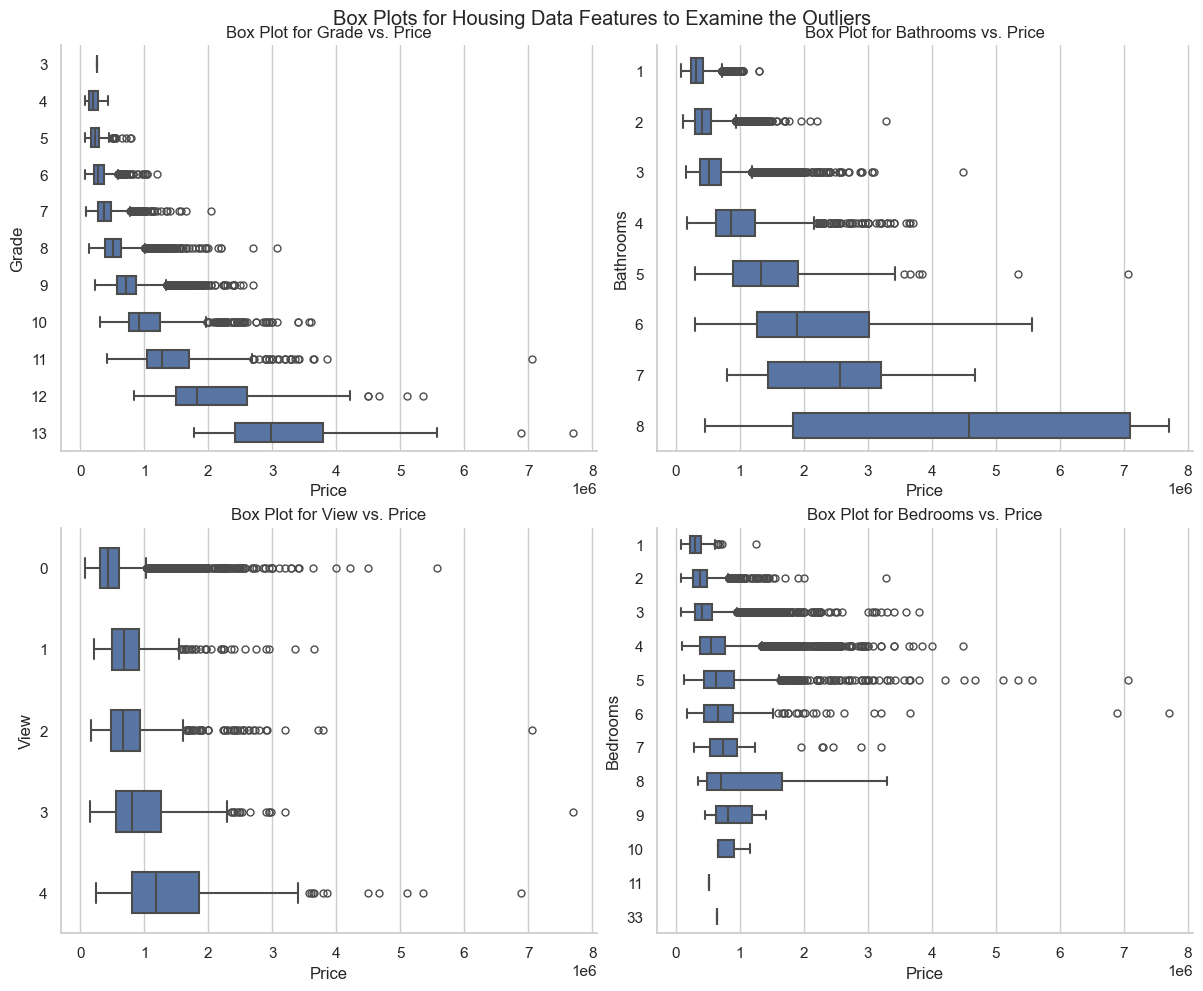

In [25]:
# Create multiple box plots using seaborn

sns.set_theme(style=None)
sns.set_style("whitegrid", {'axes.spines.bottom': True, 'axes.spines.left': True,
                            'axes.spines.right': False, 'axes.spines.top': False})

# Set the layout for the grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Create boxplot for Grade vs. Price
sns.boxplot(data=king_county, x='price', y='grade',
            orient='h', width=0.5, linewidth=1.5, notch=False, fliersize=5, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot for Grade vs. Price')
axes[0, 0].set_ylabel('Grade')
axes[0, 0].set_xlabel('Price')

# Create boxplot for Bathrooms vs. Price
sns.boxplot(data=king_county, x='price', y='bathrooms',
            orient='h', width=0.5, linewidth=1.5, notch=False, fliersize=5, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot for Bathrooms vs. Price')
axes[0, 1].set_ylabel('Bathrooms')
axes[0, 1].set_xlabel('Price')


# Create boxplot for View vs. Price
sns.boxplot(data=king_county, x='price', y='view',
            orient='h', width=0.5, linewidth=1.5, notch=False, fliersize=5, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot for View vs. Price')
axes[1, 0].set_ylabel('View')
axes[1, 0].set_xlabel('Price')

# Create boxplot for Bedrooms vs. Price
sns.boxplot(data=king_county, x='price', y='bedrooms',
            orient='h', width=0.5, linewidth=1.5, notch=False, fliersize=5, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot for Bedrooms vs. Price')
axes[1, 1].set_ylabel('Bedrooms')
axes[1, 1].set_xlabel('Price')

# Add overall title
plt.suptitle("Box Plots for Housing Data Features to Examine the Outliers")

plt.tight_layout(pad=0.5)
plt.show()

In [26]:
# Drop the record with 33 bedrooms
king_county = king_county.drop(king_county[king_county['bedrooms'] == 33].index)

In [27]:
# Now, we need some extra columns so that we can see different sides of the data
king_county['month'] = king_county['date'].dt.month_name()

# Create year column from date column
king_county['year'] = king_county['date'].dt.year

# Create age column
king_county['age'] = king_county['year'] - king_county['yr_built']

In [28]:
king_county.head(10)

,date,price,house_id,bedrooms,bathrooms,sqft_living,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,month,year,age
0,2014-10-13,221900.000,7129300520,3,1,1180,0,3,7,1955,0,98178,47.511,-122.257,October,2014,59
1,2014-12-09,538000.000,6414100192,3,3,2570,0,3,7,1951,19910,98125,47.721,-122.319,December,2014,63
2,2015-02-25,180000.000,5631500400,2,1,770,0,3,6,1933,0,98028,47.738,-122.233,February,2015,82
3,2014-12-09,604000.000,2487200875,4,3,1960,0,5,7,1965,0,98136,47.521,-122.393,December,2014,49
4,2015-02-18,510000.000,1954400510,3,2,1680,0,3,8,1987,0,98074,47.617,-122.045,February,2015,28
5,2014-05-12,1230000.000,7237550310,4,5,5420,0,3,11,2001,0,98053,47.656,-122.005,May,2014,13
6,2014-06-27,257500.000,1321400060,3,3,1715,0,3,7,1995,0,98003,47.310,-122.327,June,2014,19
8,2015-04-15,229500.000,2414600126,3,1,1780,0,3,7,1960,0,98146,47.512,-122.337,April,2015,55
9,2015-03-12,323000.000,3793500160,3,3,1890,0,3,7,2003,0,98038,47.368,-122.031,March,2015,12
10,2015-04-03,662500.000,1736800520,3,3,3560,0,3,8,1965,0,98007,47.601,-122.145,April,2015,50


In [29]:
king_county.describe()

,date,price,house_id,bedrooms,bathrooms,sqft_living,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,year,age
count,21533,21533.000,21533.000,21533.000,21533.000,21533.000,21533.000,21533.000,21533.000,21533.000,21533.000,21533.000,21533.000,21533.000,21533.000,21533.000
mean,2014-10-29 02:01:46.664189696,540053.022,4582452267.860,3.372,2.440,2079.849,0.234,3.410,7.657,1971.003,688.699,98077.938,47.560,-122.214,2014.323,43.319
min,2014-05-02 00:00:00,78000.000,1000102.000,1.000,1.000,370.000,0.000,1.000,3.000,1900.000,0.000,98001.000,47.156,-122.519,2014.000,-1.000
25%,2014-07-22 00:00:00,322000.000,2123049502.000,3.000,2.000,1430.000,0.000,3.000,7.000,1951.000,0.000,98033.000,47.471,-122.328,2014.000,18.000
50%,2014-10-16 00:00:00,450000.000,3904950190.000,3.000,3.000,1910.000,0.000,3.000,7.000,1975.000,0.000,98065.000,47.572,-122.230,2014.000,40.000
75%,2015-02-17 00:00:00,645000.000,7312200040.000,4.000,3.000,2550.000,0.000,4.000,8.000,1997.000,0.000,98118.000,47.678,-122.125,2015.000,63.000
max,2015-05-27 00:00:00,7700000.000,9900000190.000,11.000,8.000,13540.000,4.000,5.000,13.000,2015.000,20150.000,98199.000,47.778,-121.315,2015.000,115.000
std,NaN,366067.448,2876807527.456,0.904,0.922,917.462,0.766,0.651,1.173,29.376,3643.227,53.508,0.139,0.141,0.467,29.378


In [30]:
king_county.columns

Index(['date', 'price', 'house_id', 'bedrooms', 'bathrooms', 'sqft_living',
       'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'month', 'year', 'age'],
      dtype='object')

# 3 assumptions/hypotheses for the overall data.

1. In the months of January, February and December may have the lowest sales rate.
2. Prices may have a positive correlation with the number of bathrooms and bedrooms.
3. The houses with higher grades may have a negative correlation with sales rate and positive correlation with prices.

# Hyphothesis #1: In the months of January, February and December may have the lowest sale rates

## Finding the months that have lowest sales rate

<Figure size 800x500 with 0 Axes>

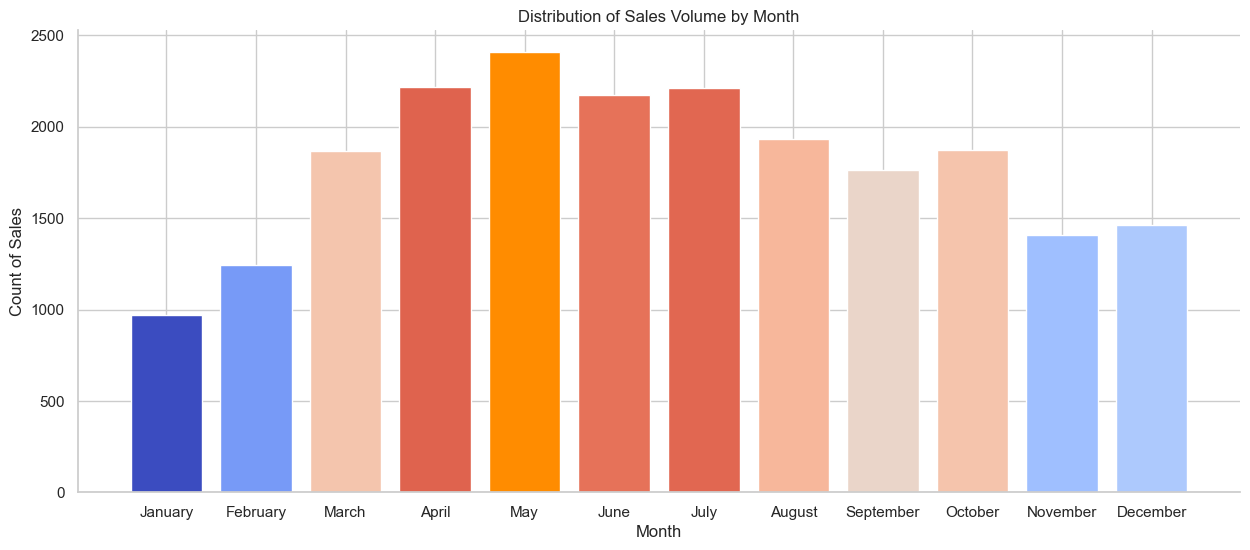

In [31]:
# Define the correct order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']

# Create a categorical column for month name
king_county['month_ordered'] = pd.Categorical(king_county['month'], categories=month_order, ordered=True)

month_sales = king_county['month_ordered'].value_counts().reindex(month_order)

plt.clf()

# identifying the months/season with the highest sales
fig, ax = plt.subplots(1, 1, figsize=(15, 6))


colors = plt.cm.coolwarm(np.interp(month_sales, (month_sales.min(), month_sales.max()), (0, 1)))
highlight_colors = ['darkorange' if count > 2300 else color for count, color in zip(month_sales.values, colors)]

bars = ax.bar(month_sales.index, month_sales.values, color=highlight_colors)

ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Count of Sales")
ax.set_title("Distribution of Sales Volume by Month");

# Drop the month_ordered column
king_county.drop('month_ordered', axis=1, inplace=True)

### With this chart, we can say that the first assumption is mostly true since January and Febuary have the lowest rate of sale in the years between 2014 and 2015. Followingly, the first recommendation for the client is that to sell houses in short time, the months to consider to sell is between April and July. 

# Hyphothesis #2: Prices may have a positive correlation with the number of bathrooms and bedrooms

## Finding out the relationship between the room numbers and sale rates

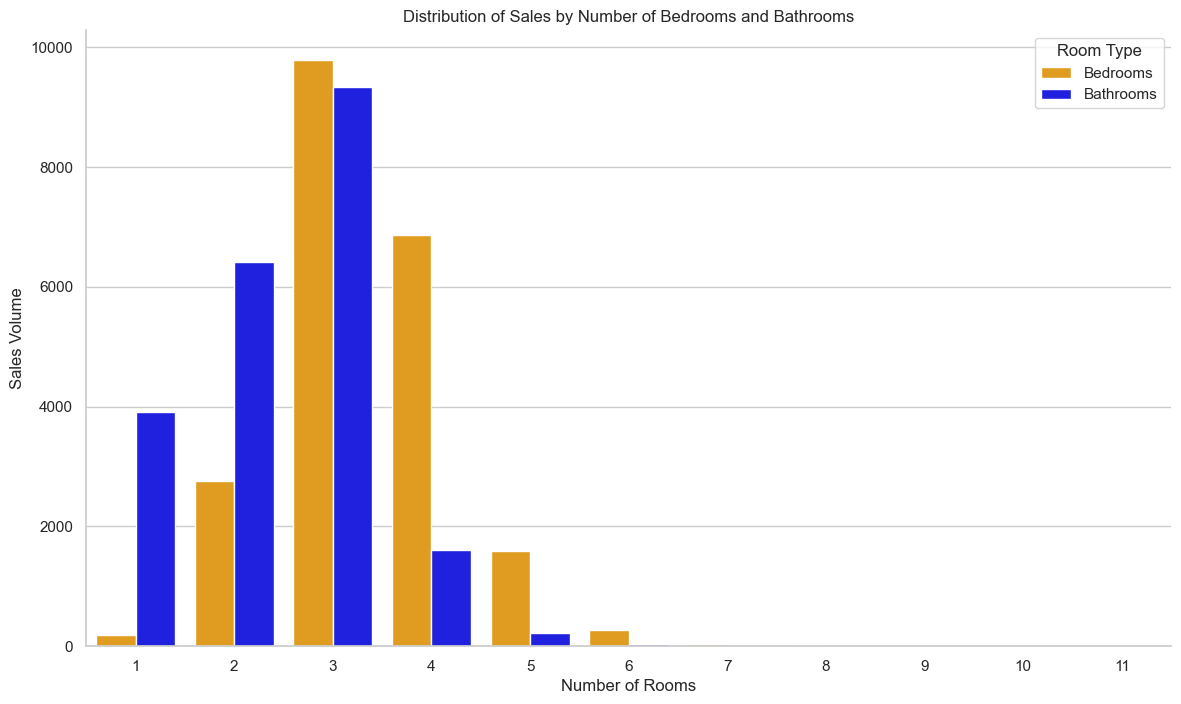

In [32]:
# Calculate sales count by the number of bedrooms
bedroom_sales = king_county.groupby('bedrooms').size().reset_index(name='sales_count')
bedroom_sales['type'] = 'Bedrooms'  # Add a new column to distinguish the type

# Calculate sales count by the number of bathrooms
bathroom_sales = king_county.groupby('bathrooms').size().reset_index(name='sales_count')
bathroom_sales['type'] = 'Bathrooms'  # Add a new column to distinguish the type

# Combine the two dataframes
combined_sales = pd.concat([bedroom_sales.rename(columns={'bedrooms': 'rooms'}),
                            bathroom_sales.rename(columns={'bathrooms': 'rooms'})])

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x='rooms', y='sales_count', hue='type', data=combined_sales, palette={'Bedrooms': 'orange', 'Bathrooms': 'blue'})

# Adding titles and labels
plt.title('Distribution of Sales by Number of Bedrooms and Bathrooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Sales Volume')
plt.legend(title='Room Type')

# Show the plot
plt.show()

# Finding out the relationship between the room numbers and prices

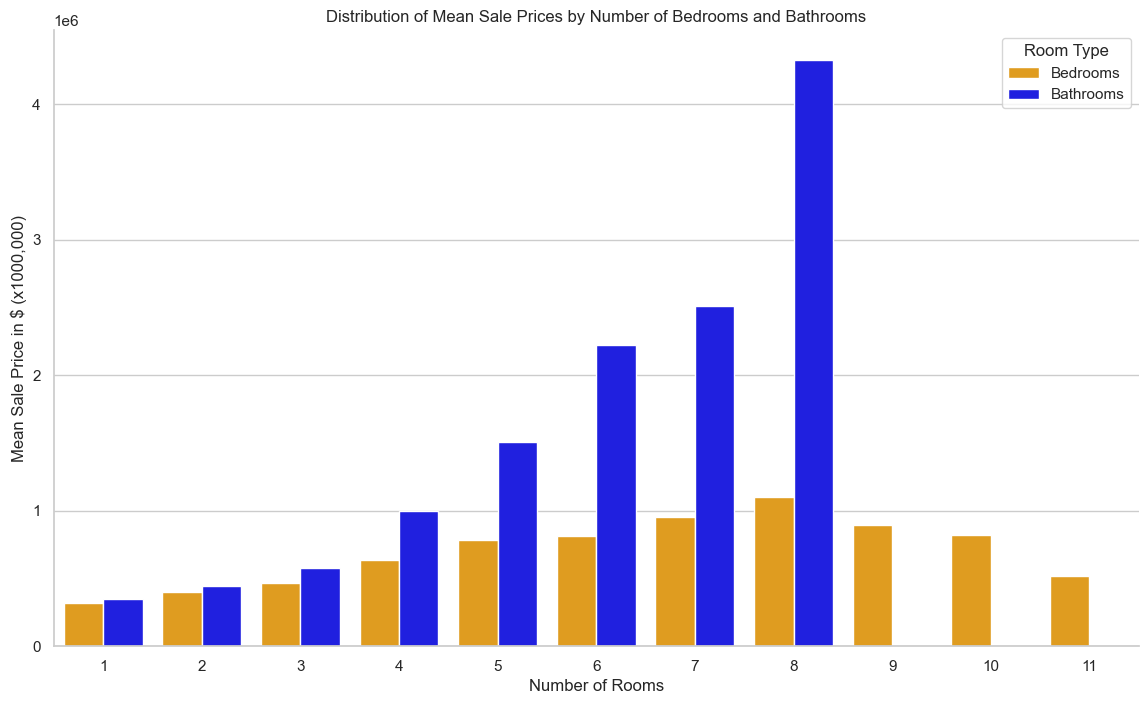

In [33]:
# Calculate prices by the number of bedrooms
bedroom_prices = king_county.groupby('bedrooms')['price'].mean().reset_index(name='prices_mean')
bedroom_prices['type'] = 'Bedrooms'  # Add a new column to distinguish the type

# Calculate prices by the number of bathrooms
bathroom_prices = king_county.groupby('bathrooms')['price'].mean().reset_index(name='prices_mean')
bathroom_prices['type'] = 'Bathrooms'  # Add a new column to distinguish the type

# Combine the two dataframes
combined_prices = pd.concat([bedroom_prices.rename(columns={'bedrooms': 'rooms'}),
                            bathroom_prices.rename(columns={'bathrooms': 'rooms'})])

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x='rooms', y='prices_mean', hue='type', data=combined_prices, palette={'Bedrooms': 'orange', 'Bathrooms': 'blue'})

# Adding titles and labels
plt.title('Distribution of Mean Sale Prices by Number of Bedrooms and Bathrooms')
plt.xlabel('Number of Rooms')
plt.ylabel("Mean Sale Price in $ (x1000,000)")
plt.legend(title='Room Type')

# Show the plot
plt.show()

### These charts show that the assumption on a positive correlation between the number of bedrooms and bathrooms is false; however, these charts also reveal that to have a max profit, houses with 8 bedrooms and 5, 6, 7, or 8 bathrooms are sold in high prices. Followingly, the second recommondation is to sell the houses with at least 3 bedrooms and 3 bathrooms in order to sell fast, and/or houses that have 8 bedrooms and at least 5 bathrooms in order to sell in a high profit

# Hyphothesis #3: The houses with higher grades may have a negative correlation with sales rate and positive correlation with prices.

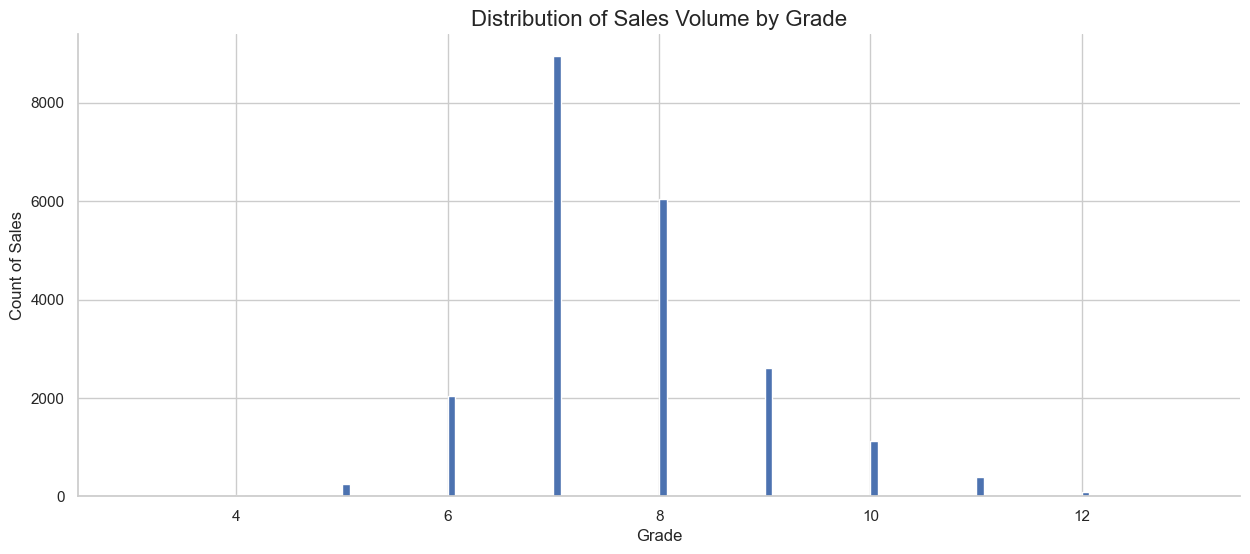

In [34]:
# Plot a distribution of sales volume by grade
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the histogram
ax.hist(
    x=king_county['grade'],
    bins='auto',
)

ax.set_xlabel("Grade", fontsize=12)
ax.set_ylabel("Count of Sales")
ax.set_title("Distribution of Sales Volume by Grade", fontsize=16);

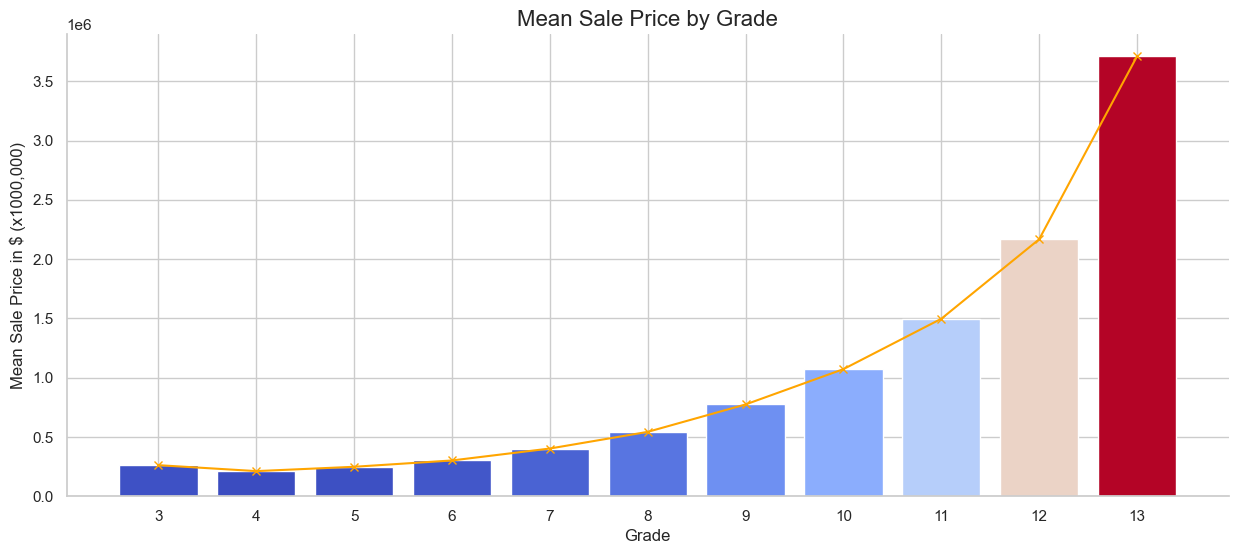

In [43]:
# A Bar Chart of Mean Sale Price by Grade
fig, ax = plt.subplots(figsize=(15, 6))

# Calculate the mean sale price
mean_price_per_grade = king_county.groupby('grade')['price'].mean()

# Define a colormap and normalize the data
colormap = plt.get_cmap('coolwarm')
normalize = plt.Normalize(mean_price_per_grade.min(), mean_price_per_grade.max())

ax.bar(
    x = mean_price_per_grade.index,
    height = mean_price_per_grade.values,
    tick_label=mean_price_per_grade.index,
    color=colormap(normalize(mean_price_per_grade.values))
)

# Calculate the x-coordinates of the bar centers
x_centers = np.arange(3, 14)

# Plot a line graph along the top center points of the bars
plt.plot(x_centers, mean_price_per_grade.values, marker='x', 
         linestyle='-', color='orange', label='Trendline')

# Add a color bar
# sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
# sm = sm.set_array([])
# cbar = plt.colorbar(sm)

ax.set_xlabel("Grade", fontsize=12)
ax.set_ylabel("Mean Sale Price in $ (x1000,000)", fontsize=12)
ax.set_title("Mean Sale Price by Grade", fontsize = 16);

### According to these two charts, the hyphothesis that states; houses with higher grades may have a negative correlation with sales rate and positive correlation with prices, is half true half wrong. While the correlation between the prices and grades is positive, and the relationship between sale rates and grade of houses remains rather normal, since the houses graded 7 are the most sold houses within the data we have. Followingly, the last recommendation for the client is to find and sell houses that graded between 7 and 13 so the chances of selling fast and with a high profit would be higher.

# Top 25 houses - high prices

In [36]:
# Filter the DataFrame for sales in May
may_sales = king_county[king_county['month'] == 'May']

# Select the required columns
may_sales_info = may_sales[['date', 'price', 'house_id', 'bedrooms', 'bathrooms', 'sqft_living',
       'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'month', 'year', 'age']]

# Display the results
may_sales_info.head(25)

# Sorting the results
sorted_results = may_sales_info.sort_values('price', ascending=False)

# Display the sorted results
top_price = sorted_results.head(25)
top_price


,date,price,house_id,bedrooms,bathrooms,sqft_living,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,month,year,age
12358,2015-05-06,4210000.000,6065300370,5,6,7440,0,3,12,2003,0,98006,47.569,-122.189,May,2015,12
16288,2014-05-30,3710000.000,7397300170,4,4,5550,2,4,12,2000,0,98039,47.639,-122.234,May,2014,14
18467,2015-05-11,3650000.000,4389201095,5,4,5020,1,3,12,2007,0,98004,47.615,-122.213,May,2015,8
10435,2015-05-08,3400000.000,1118000320,4,4,4260,0,3,11,1939,20100,98112,47.638,-122.288,May,2015,76
7184,2014-05-07,3200000.000,7159200005,7,5,6210,2,5,11,1910,0,98109,47.631,-122.354,May,2014,104
12859,2014-05-29,3100000.000,2424049029,6,5,6980,4,4,12,1999,0,98040,47.555,-122.231,May,2014,15
20425,2015-05-07,3000000.000,1925059254,5,4,6670,0,3,12,2007,0,98004,47.641,-122.221,May,2015,8
269,2015-05-04,2900000.000,7960900060,4,4,5050,2,3,11,1982,0,98004,47.631,-122.223,May,2015,33
5444,2015-05-01,2850000.000,6065300840,4,4,5040,0,5,10,1976,0,98006,47.570,-122.188,May,2015,39
14039,2014-05-29,2750000.000,7397300220,4,4,4430,0,3,10,1952,20070,98039,47.640,-122.237,May,2014,62


# Top 25 houses - 'very good' condition

In [37]:
# The top 25 houses that are sold in May, ordered by their condition, descending.

# Filter the DataFrame for sales in May
may_sales = king_county[king_county['month'] == 'May']

# Select the required columns
may_sales_info1 = may_sales[['date', 'price', 'house_id', 'bedrooms', 'bathrooms', 'sqft_living',
       'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'month', 'year', 'age']]

# Display the results
may_sales_info1.head(25)

# Sorting the results
sorted_results1 = may_sales_info1.sort_values('condition', ascending=False)

# Display the sorted results
top_condition = sorted_results1.head(25)
top_condition

,date,price,house_id,bedrooms,bathrooms,sqft_living,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,month,year,age
8137,2014-05-16,250000.000,1545801970,3,2,1900,0,5,7,1966,0,98038,47.359,-122.054,May,2014,48
19241,2014-05-23,550000.000,6071200455,3,2,1830,0,5,8,1959,0,98006,47.553,-122.181,May,2014,55
7601,2014-05-30,715000.000,4077800026,4,2,3420,3,5,8,1947,0,98125,47.708,-122.277,May,2014,67
8069,2014-05-29,450000.000,3390600025,4,2,2240,0,5,7,1956,0,98106,47.533,-122.365,May,2014,58
19427,2014-05-12,630000.000,6822100155,4,2,1770,0,5,7,1911,0,98199,47.649,-122.401,May,2014,103
312,2014-05-02,2380000.000,1860600135,5,3,3650,4,5,10,1921,0,98119,47.635,-122.367,May,2014,93
282,2015-05-13,2050000.000,7424700045,5,3,3830,1,5,9,1905,19940,98122,47.617,-122.287,May,2015,110
19322,2014-05-28,875000.000,9136100056,3,3,2280,0,5,7,1917,0,98103,47.669,-122.335,May,2014,97
7403,2015-05-11,360000.000,1591600307,3,2,1810,0,5,7,1959,0,98146,47.499,-122.364,May,2015,56
8265,2015-05-11,475000.000,6046400755,5,2,2020,0,5,7,1911,0,98103,47.691,-122.345,May,2015,104


In [38]:
all_joined = pd.concat([top_price, top_condition]).drop_duplicates().reset_index(drop=True)

In [39]:
import geojson

import plotly.graph_objs as go

In [52]:
all_joined.dtypes

date            datetime64[ns]
price                  float64
house_id                 int64
bedrooms                 int64
bathrooms                int64
sqft_living              int64
view                     int64
condition                int64
grade                    int64
yr_built                 int64
yr_renovated             int64
zipcode                  int64
lat                    float64
long                   float64
month                   object
year                     int32
age                      int64
dtype: object

In [70]:
all_joined['condition'].unique()

array([3, 4, 5, 2])

# Top 25 Houses

### Because of the increasing gentrification within King County and also in other states, there isn't a real middle class neighborhood; therefore, my advice would be to just focusing on selling the houses that are very good condition. Here, on the map there are the recommended houses which are in very good condition and they can be sold fast and profitably in Summer, especially in May.

In [64]:
import folium
from branca.colormap import LinearColormap

In [93]:
top_map = LinearColormap(colors=['blue', 'purple', 'orange'], vmin=1, vmax=13)

m = folium.Map(location=[top_condition.lat.mean(), all_joined.long.mean()], zoom_start=11.5)

for i in range(len(top_condition)):
    condition_value = top_condition.iloc[i]['condition']
    price_value = top_condition.iloc[i]['price']
    grade_value = top_condition.iloc[i]['grade']

    folium.CircleMarker(
        location=[top_condition.iloc[i]['lat'], top_condition.iloc[i]['long']],
        radius=5,
        fill=True,
        color=top_map(grade_value),
        fill_opacity=0.7,
        tooltip=folium.Tooltip(f'Grade: {grade_value}<br>Condition: {condition_value}<br>Price: ${price_value:,.2f}')
    ).add_to(m)


m.save('condition_topmap.html')
m

# file:///C:/Users/admin/dataScienceBootcamp/my_eda_project/condition_topmap.html